# Data Exploration of USPTO Data

This document is initiated in August 2024. We are exploring several public datasets published by USPTO.
Here are the files as well as their publicly available explanation.

- Patent assignment economics data (stata (.dta) and MS excel (.csv)): Contains detailed information on roughly 10.0 million patent assignments and other transactions recorded at the USPTO since 1970 and involving roughly 17.8 million patents and patent applications. For more information: http://www.uspto.gov/learning-and-resources/electronic-data-products/data

- Patent examination research dataset (stata (.dta) and MS excel : Contains detailed information on more than 13 million publicly viewable patent applications filed with the USPTO along with more than 1 million PCT applications through June 2023. The data files include information on each application's characteristics, prosecution history, continuation history, claims of foreign priority, patent term adjustment history, publication history, and correspondence address information.

- Patent application full text data/XML: Contains (MAR 15, 2001 - present) the full text of each patent application (non-provisional utility and plant) published weekly (Thursdays) (excludes images/drawings). The file format is eXtensible Markup Language (XML) in accordance with the Patent Application International Common Element (ICE) Document Type Definition (DTD).

- Historical masterfile: The historical_masterfile contains micro-level application, NBER sub-category, and prosecution data on 2.2 million patent applications filed from 1981 to 2015 and 8.9 million patents issued through 2014.

- https://patentsview.org/download/data-download-tables


In [1]:
# libraries
import pandas as pd
import numpy as np
from os import listdir
import matplotlib.pyplot as plt

## Cockburn (2022)

After initial data exploration, the most appropriate datasets to replicate his paper are "historical masterfile" and "patent examination research dataset". The two datasets can be matched by application ID. 

- Historical masterfile contains information on publication number, patent number, NBER number, USPC number, application date, prior date, disposal date, application number, as well as other information. 
- Patent examination research dataset provides information on the parent country, foreign parent ID, foreign parent date and application number. 

In [136]:
location = pd.read_csv("data/pg_location_not_disambiguated.tsv", sep='\t') 

In [137]:
location = location[location['raw_country']=="CA"]

In [138]:
applicants = pd.read_csv("data/pg_inventor_not_disambiguated.tsv", sep='\t') 

In [139]:
applications = pd.read_csv("data/pg_published_application.tsv", sep='\t') 

In [ ]:
data = pd.merge(location, applicants, on =["rawlocation_id"])

In [ ]:
location.head(1)

In [ ]:
applicants.head(1)

In [ ]:
applications.head(1)

In [ ]:
data = pd.merge(location, applicants, on= ["rawlocation_id"])

In [ ]:
data = data[["pgpub_id", "raw_country"]]

In [ ]:
data = pd.merge(data, applications, on = ["pgpub_id"])

In [ ]:
data['filing_date'] = pd.to_datetime(data['filing_date'], errors='coerce')

In [ ]:
data = data[data['application_id'].notnull()]

In [ ]:
data["year"] = data["filing_date"].dt.year

In [ ]:
data = data[data["year"]<2022]

In [ ]:
data = data[data["year"]>=1990]

In [129]:
#data = data.drop_duplicates(subset = ["pgpub_id"])

In [130]:
count_agg_year = data.groupby('year').size().reset_index(name='counts')

In [132]:
count_agg_year

,year,counts
0,2001,1121
1,2002,5080
2,2003,6413
3,2004,7192
4,2005,7778
5,2006,7954
6,2007,8110
7,2008,9085
8,2009,8739
9,2010,8885


<Axes: xlabel='year'>

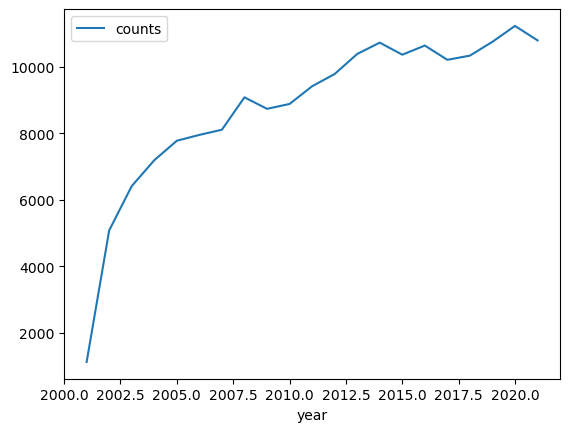

In [131]:
count_agg_year.plot(x="year")